Refering to [this question](https://stackoverflow.com/questions/65833565/can-i-change-the-byte-ordering-from-little-endian-to-big-endian-in-qiskit) on SO: 

The regular Matrix representation of a CNOT gate as found in literature is:

$$\begin{bmatrix}
      1 & 0 &  0 & 0\\
      0 & 1 &  0 & 0\\
      0 & 0 &  0 & 1\\
      0 & 0 &  1 & 0     
\end{bmatrix}$$

However in Qiskit, the matrix is represented as CNOT =

$$\begin{bmatrix}
      1  & 0 &  0 &  0\\
      0  & 0 &  0 &  1\\
      0  & 0 &  1 &  0\\
      0  & 1 &  0 &  0
\end{bmatrix}$$

Is this something related to the Big-endian/Little-endian issue? Is there a way to represent my matrix the same way it is recovered in literature?


In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2)
circuit.cx(0, 1)

print('Little endian:')
print(Operator(circuit))

print('Big endian:')
print(Operator(circuit.reverse_bits()))

Little endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Big endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [6]:
from qiskit_textbook.tools import array_to_latex
from qiskit import QuantumCircuit, execute, Aer

backend = Aer.get_backend("unitary_simulator")
out1 = execute(circuit,backend).result().get_unitary()
out2 = execute(circuit.reverse_bits(),backend).result().get_unitary()

from qiskit_textbook.tools import array_to_latex
array_to_latex(out1, pretext="\\text{U_(little endian) = }")
array_to_latex(out2, pretext="\\text{U_(big endian) = }")
 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Thus literature uses big endian. qiskit uses little endian. 

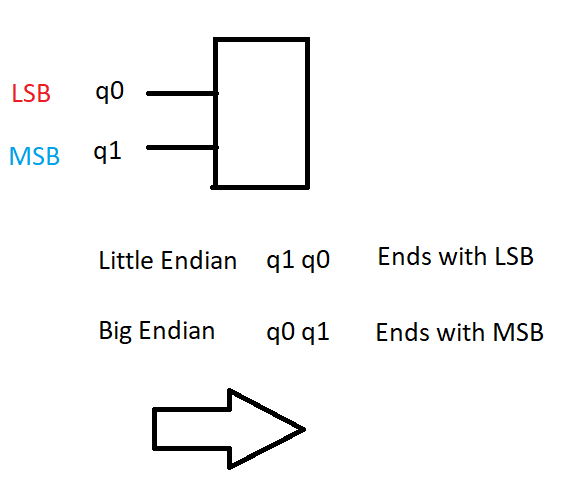